---
# **1. Installation**
---

In [1]:
!pip install nltk
!pip install --upgrade git+https://github.com/flairNLP/flair.git
!pip install textblob
!pip install stanza
!pip install spacy
!pip install tqdm

  Cloning https://github.com/flairNLP/flair.git to /tmp/pip-req-build-v7fuyfb1
  Running command git clone -q https://github.com/flairNLP/flair.git /tmp/pip-req-build-v7fuyfb1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 276kB 8.3MB/s 
     |████████████████████████████████| 890kB 18.1MB/s 
     |████████████████████████████████| 19.7MB 1.4MB/s 
     |████████████████████████████████| 983kB 59.6MB/s 
     |████████████████████████████████| 71kB 9.2MB/s 
     |████████████████████████████████| 798kB 55.1MB/s 
     |████████████████████████████████| 1.1MB 51.5MB/s 
     |████████████████████████████████| 890kB 47.6MB/s 
     |████████████████████████████████| 3.0MB 46.7MB/s 
  Created wheel for flair: filename=flair-0.6.0.post1-cp36-none-any.whl size=188603 sha256=8ab3dc90371d97c4df07418f81da388c719b6831a1033108f13a08bad0e63fd6
  Stored in directory: /tmp/pip-ephem-whe

---
# **2. Imports**
---

### i. core

In [2]:
import re
import logging
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None # default='warn'
import matplotlib.pyplot as plt
from tqdm import tqdm
from time import sleep

### ii. NLTK Vader Sentiment Intensity Analyzer

In [3]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
SIA = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


### iii. Stanza

In [4]:
import stanza
stanza.download('en', package='ewt', processors='tokenize,sentiment', verbose=True)
stanza.download('en', package='default', processors='tokenize,sentiment', verbose=True)
stNLP = stanza.Pipeline(processors='tokenize,sentiment', lang='en', use_gpu=True)

2020-09-11 01:35:57 WARNING: Can not find sentiment: ewt from official model list. Ignoring it.
2020-09-11 01:35:57 INFO: Downloading these customized packages for language: en (English)...
| Processor | Package |
-----------------------
| tokenize  | ewt     |

2020-09-11 01:36:00 INFO: Finished downloading models and saved to /root/stanza_resources.
2020-09-11 01:36:00 INFO: Downloading these customized packages for language: en (English)...
| Processor | Package |
-----------------------
| tokenize  | ewt     |
| sentiment | sstplus |
| pretrain  | ewt     |

2020-09-11 01:36:00 INFO: File exists: /root/stanza_resources/en/tokenize/ewt.pt.
2020-09-11 01:37:53 INFO: Finished downloading models and saved to /root/stanza_resources.
2020-09-11 01:37:53 INFO: Loading these models for language: en (English):
| Processor | Package |
-----------------------
| tokenize  | ewt     |
| sentiment | sstplus |

2020-09-11 01:37:53 INFO: Use device: gpu
2020-09-11 01:37:53 INFO: Loading: tokenize


### iv. Spacy Text Categorizer

In [5]:
import random
import spacy
from spacy.util import minibatch, compounding
from spacy.pipeline import TextCategorizer

spacy.prefer_gpu()

TRAIN_DATA = [
    ["My little kitty is so special", {"Cat": True}],
    ["Dude, Totally, Yeah, Video Games", {"Cat": False}],
    ["Should I pay $1,000 for the iPhone X?", {"Cat": False}],
    ["The iPhone 8 reviews are here", {"Cat": False}],
    ["Noa is a great cat name.", {"Cat": True}],
    ["We got a new kitten!", {"Cat": True}]
]

nlp = spacy.load("en_core_web_sm")
category = nlp.create_pipe("textcat", config={"exclusive_classes": True})
nlp.add_pipe(category)

# add label to text classifier
category.add_label("Cat")
category.add_label('False')

optimizer = nlp.begin_training()
losses = {}

for i in range(100):
    random.shuffle(TRAIN_DATA)

    for batch in minibatch(TRAIN_DATA, size=8):
        texts = [nlp(text) for text, entities in batch]
        annotations = [{"cats": entities} for text, entities in batch]
        nlp.update(texts, annotations, sgd=optimizer, losses=losses)
    print(i, losses)

0 {'textcat': 0.006944445427507162, 'ner': 0.0, 'parser': 0.0, 'tagger': 0.4249247908592224}
1 {'textcat': 0.013884779997169971, 'ner': 0.0, 'parser': 0.0, 'tagger': 0.42840095376595855}
2 {'textcat': 0.020738163497298956, 'ner': 0.0, 'parser': 0.0, 'tagger': 0.4284796733991243}
3 {'textcat': 0.02743456605821848, 'ner': 0.0, 'parser': 0.0, 'tagger': 0.4284865308291046}
4 {'textcat': 0.033903070725500584, 'ner': 0.0, 'parser': 0.0, 'tagger': 0.428489804837227}
5 {'textcat': 0.040078638587147, 'ner': 0.0, 'parser': 0.0, 'tagger': 0.42849279772053706}
6 {'textcat': 0.0459209093824029, 'ner': 0.0, 'parser': 0.0, 'tagger': 0.4284954946324433}
7 {'textcat': 0.0513830566778779, 'ner': 0.0, 'parser': 0.0, 'tagger': 0.42849746124306876}
8 {'textcat': 0.05643745930865407, 'ner': 0.0, 'parser': 0.0, 'tagger': 0.4284986564729252}
9 {'textcat': 0.061056784354150295, 'ner': 0.0, 'parser': 0.0, 'tagger': 0.42849931721104895}
10 {'textcat': 0.0652352157048881, 'ner': 0.0, 'parser': 0.0, 'tagger': 0.42

In [6]:
doc = nlp(u'This is my cat called kittens the kitty')
print(doc.cats)

{'Cat': 0.99357008934021, 'False': 0.0064299581572413445}


In [7]:
TRAIN_DATA = [
    ("beef", {"cats": {"POSITIVE": 1.0, "NEGATIVE": 0.0}}),
    ("apple", {"cats": {"POSITIVE": 0, "NEGATIVE": 1}})
]

In [8]:
otro = nlp(u"Dude, Totally, Yeah, Video Games")
print(otro.cats)

{'Cat': 0.00012423779116943479, 'False': 0.9998757839202881}


### v. TextBlob

In [9]:
from textblob import TextBlob

### vi. Flair

In [10]:
import flair
flair_sent = flair.models.TextClassifier.load('en-sentiment')

2020-09-11 01:38:48,159 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_3.1.pt not found in cache, downloading to /tmp/tmpcaibgjmy


100%|██████████| 266147697/266147697 [00:06<00:00, 39203331.22B/s]

2020-09-11 01:38:55,014 copying /tmp/tmpcaibgjmy to cache at /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt


2020-09-11 01:38:55,525 removing temp file /tmp/tmpcaibgjmy
2020-09-11 01:38:55,553 loading file /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt


---
# **3. Defining functions**
---

In [11]:
def siaVader_compound(text):
    scores = SIA.polarity_scores(text)
    
    comp_score = scores['compound']
    if comp_score >= 0.05:
        str_comp = 'pos'
    elif comp_score <= -0.05:
        str_comp = 'neg'
    else: # (compound score > -0.05) and (compound score < 0.05)
        str_comp = 'neu'
    return str_comp

def siaVader_maxScore(text):
    scores = SIA.polarity_scores(text)
    
    del scores['compound']
    index = np.argmax(list(scores.values()))
    vader_MaxScore = list(scores.values())[index]
    vader_label = list(scores)[index]
    
    return vader_label

###
def siaVader_byWord(text):
    c = 0
    for n, y in enumerate(text):
        x = SIA.polarity_scores(y)
        if x['compound'] != 0.0:
            c += 1
            # print('{}. {} {}'.format(c, x, y))
            return 'pos' if x > 0.05 else 'neg'

In [12]:
def text_blob_subjective(text):
    return TextBlob(text).sentiment

In [13]:
def flair_lstm(text):
    x = flair.data.Sentence(text)
    flair_sent.predict(sentences=x)
    return x.labels

In [14]:
def stanza_funct(text):
    try:
        data = stNLP(text)
        for sentence in data.sentences:
            return sentence.sentiment
    except:
        print('{...}', end='; ')

---

# **4. Comparing Sentiment Analyzers**

---

### **data (text)**

In [15]:
data = [
        'not confident',
        'unsure',
        'does not handles pressure',
        'disordered',
        'talks too much',
        'uninsterested',
        'sad',
        'unfriendly',
        
        'confident',
        'certain',
        'handles pressure',
        'organized',
        'concise',
        'interested',
        'happy',
        'friendly'
        ]     

In [16]:
#data = "I'm confident of myself but sometimes I'm unsure and unfriendly however I'm concise when I'm interested in being someone organizated who handles pressure"
#data = data.split()

### **NLTK Vader**
* VADER, has different ratings depending on the form of the word and therefore the input should not be stemmed or lemmatized.

* disadvantage of this approach is that Out of Vocab (OOV) words that the sentiment analysis tool has not seen before will not be classified as positive/negative (e.g. typos).

In [17]:
SIA.polarity_scores(' '.join(data))

{'compound': 0.6553, 'neg': 0.271, 'neu': 0.299, 'pos': 0.43}

In [18]:
print(data)
print([(lambda x: SIA.polarity_scores(x)['compound'])(x) for x in data])

['not confident', 'unsure', 'does not handles pressure', 'disordered', 'talks too much', 'uninsterested', 'sad', 'unfriendly', 'confident', 'certain', 'handles pressure', 'organized', 'concise', 'interested', 'happy', 'friendly']
[-0.3875, -0.25, 0.2235, 0.0, 0.0, 0.0, -0.4767, -0.3612, 0.4939, 0.2732, -0.296, 0.0, 0.0, 0.4019, 0.5719, 0.4939]


In [19]:
siaVader_compound(' '.join(data))

'pos'

In [20]:
print(data)
print([(lambda x: siaVader_compound(x))(x) for x in data])

['not confident', 'unsure', 'does not handles pressure', 'disordered', 'talks too much', 'uninsterested', 'sad', 'unfriendly', 'confident', 'certain', 'handles pressure', 'organized', 'concise', 'interested', 'happy', 'friendly']
['neg', 'neg', 'pos', 'neu', 'neu', 'neu', 'neg', 'neg', 'pos', 'pos', 'neg', 'neu', 'neu', 'pos', 'pos', 'pos']


In [21]:
siaVader_maxScore(' '.join(data))

'pos'

In [22]:
print(data)
print([(lambda x: siaVader_maxScore(x))(x) for x in data])

['not confident', 'unsure', 'does not handles pressure', 'disordered', 'talks too much', 'uninsterested', 'sad', 'unfriendly', 'confident', 'certain', 'handles pressure', 'organized', 'concise', 'interested', 'happy', 'friendly']
['neg', 'neg', 'neu', 'neu', 'neu', 'neu', 'neg', 'neg', 'pos', 'pos', 'neg', 'neu', 'neu', 'pos', 'pos', 'pos']


## **TextBlob**
* use a bag of words classifier, but the advantage is that it includes subjetivity analysis (factual/opinated)
* it doesn't contain the heuristics that nltk has, it won't intensify or negate a sentence's sentiment

* will return the subjectivity of the text

In [23]:
text_blob_subjective(' '.join(data))

Sentiment(polarity=0.1876984126984127, subjectivity=0.6708994708994709)

In [24]:
[(lambda x: text_blob_subjective(x))(x) for x in data]

[Sentiment(polarity=-0.25, subjectivity=0.8333333333333334),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.2, subjectivity=0.2),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=-0.5, subjectivity=1.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.5, subjectivity=0.8333333333333334),
 Sentiment(polarity=0.21428571428571427, subjectivity=0.5714285714285714),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.1, subjectivity=0.6),
 Sentiment(polarity=0.25, subjectivity=0.5),
 Sentiment(polarity=0.8, subjectivity=1.0),
 Sentiment(polarity=0.375, subjectivity=0.5)]

## **Flair LSTM**
* classifier based on a character-leval LSTM. Takes a sequences of letters and words into account when predicting

* one of its biggest advantages is that it can predict a sentiment for OOV words that it has never seen before too (such as typos)

In [25]:
flair_lstm(' '.join(data))

[NEGATIVE (0.9971)]

In [26]:
print(data)
[(lambda x: flair_lstm(x))(x) for x in data]

['not confident', 'unsure', 'does not handles pressure', 'disordered', 'talks too much', 'uninsterested', 'sad', 'unfriendly', 'confident', 'certain', 'handles pressure', 'organized', 'concise', 'interested', 'happy', 'friendly']


[[NEGATIVE (0.9999)],
 [NEGATIVE (0.9923)],
 [NEGATIVE (0.9999)],
 [NEGATIVE (0.9998)],
 [NEGATIVE (0.9933)],
 [NEGATIVE (0.9997)],
 [NEGATIVE (0.9987)],
 [NEGATIVE (0.9985)],
 [POSITIVE (0.9971)],
 [POSITIVE (0.9888)],
 [POSITIVE (0.9928)],
 [POSITIVE (0.996)],
 [POSITIVE (0.9949)],
 [POSITIVE (0.9967)],
 [POSITIVE (0.9839)],
 [POSITIVE (0.9793)]]

## **Stanza**
* stanza pipeline by using a CNN classifier.
* training this model on 2 class data using higher dimension word vectors achieves the 87 score reported in the original CNN classifier paper. On a three class projection of the SST test data, the model trained on multiple datasets gets 70.0%.

In [27]:
# 0 : neutral
# 1 : negative
# 2 : positive
print(data)
[(lambda x: stanza_funct(x))(x) for x in data]

['not confident', 'unsure', 'does not handles pressure', 'disordered', 'talks too much', 'uninsterested', 'sad', 'unfriendly', 'confident', 'certain', 'handles pressure', 'organized', 'concise', 'interested', 'happy', 'friendly']


[0, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 1, 1, 2, 2, 2]

---
# **5. Graphs**
---

### **X, Y**

In [28]:
x_plots = data

In [29]:
y_flair_scores = np.array([x for b in [list(map(lambda x: x.score, score)) for score in [(lambda x: flair_lstm(x))(x) for x in data]] for x in b])

In [30]:
y_flair_values_aux = [x for b in [list(map(lambda x: x.value, value)) for value in [(lambda x: flair_lstm(x))(x) for x in data]] for x in b]
y_flair_values = []
for i in y_flair_values_aux:
    if i == 'POSITIVE':
        y_flair_values.append(1)
    else:
        y_flair_values.append(-1)
y_flair_values = np.array(y_flair_values)

In [31]:
y_textblob_sentiment = np.array([(lambda x: text_blob_subjective(x)[0])(x) for x in data])
y_textblob_subjectivity = np.array([(lambda x: text_blob_subjective(x)[1])(x) for x in data])

In [32]:
y_vader = [(lambda x: SIA.polarity_scores(x)['compound'])(x) for x in data]
y_vader = np.array(y_vader)

In [33]:
y_stanza_1 = [(lambda x: stanza_funct(x))(x) for x in data]
y_stanza = []
for i in y_stanza_1:
    if i == 2:
        y_stanza.append(1)
    elif i == 1:
        y_stanza.append(0)
    else:
        y_stanza.append(-1)
y_stanza = np.array(y_stanza)

### **Numpy Array Results**

In [34]:
y_flair_values

array([-1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1])

In [35]:
y_flair_scores

array([0.99985647, 0.99227095, 0.99994195, 0.99975961, 0.99328858,
       0.9997341 , 0.99871314, 0.99850661, 0.99709618, 0.98880416,
       0.99275267, 0.99604756, 0.99489635, 0.9967128 , 0.98393667,
       0.97929859])

In [36]:
y_textblob_sentiment

array([-0.25      ,  0.        ,  0.        ,  0.        ,  0.2       ,
        0.        , -0.5       ,  0.        ,  0.5       ,  0.21428571,
        0.        ,  0.        ,  0.1       ,  0.25      ,  0.8       ,
        0.375     ])

In [37]:
y_textblob_subjectivity

array([0.83333333, 0.        , 0.        , 0.        , 0.2       ,
       0.        , 1.        , 0.        , 0.83333333, 0.57142857,
       0.        , 0.        , 0.6       , 0.5       , 1.        ,
       0.5       ])

In [38]:
y_stanza

array([-1,  0, -1,  0, -1,  0, -1, -1,  1,  1,  0,  0,  0,  1,  1,  1])

## **Plotting bars**

In [39]:
def plot_bar(p1y, p2y, p3y, p4y, p5y, x, size):
    plt.figure(figsize=size)
    plt.bar(x, p1y, label='Flair', color='red')
    plt.bar(x, p2y, label='TextBlob', color='blue')
    plt.bar(x, p3y, label='Subjectivity', color='purple')
    plt.bar(x, p4y, label='Vader', color='green')
    plt.bar(x, p5y, label='Stanza', color='grey')
    plt.title('NLP SCORES PREDICTION vs WORDS')
    plt.xlabel('SENTENCE')
    plt.ylabel('SCORES')
    plt.legend(loc='upper left')
    plt.xticks(rotation='vertical')
    plt.tight_layout()
    plt.grid(True)

    plt.show()

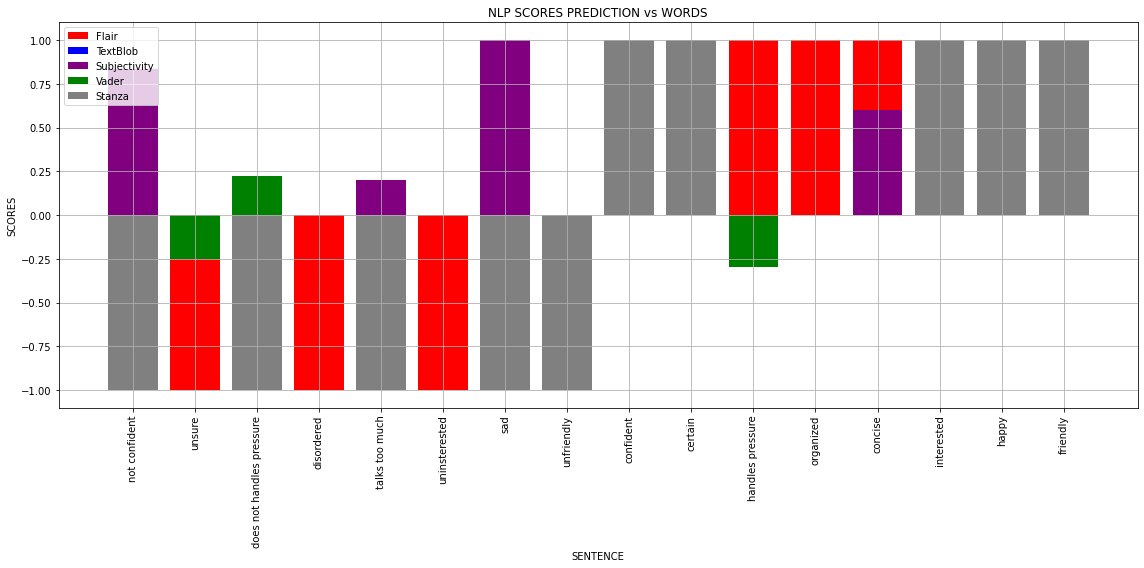

In [40]:
plot_bar(
    p1y=y_flair_values,
    p2y=y_textblob_sentiment,
    p3y=y_textblob_subjectivity,
    p4y=y_vader,
    p5y=y_stanza,
    x=x_plots,
    size=(16,  8)
)

## **Plotting lines**

In [41]:
def plot_lines(p1y, p2y, p3y, p4y, p5y, x, size):
    plt.figure(figsize=size)
    plt.plot(x, p1y, linestyle='solid', color='red', label='Flair')
    plt.plot(x, p2y, linestyle='solid', color='blue', label='TextBlob')
    plt.plot(x, p3y, linestyle='dashed', color='purple', label='Subjectivity')
    plt.plot(x, p4y, linestyle='solid', color='green', label='Vader')
    plt.plot(x, p5y, linestyle='solid', color='black', label='Stanza')
    plt.title('NLP SCORES PREDICTION vs WORDS')
    plt.xlabel('SENTENCE')
    plt.ylabel('SCORES')
    plt.legend()
    plt.xticks(size=10, rotation='vertical')
    plt.yticks(size=10)
    plt.grid(True)
    
    plt.show()

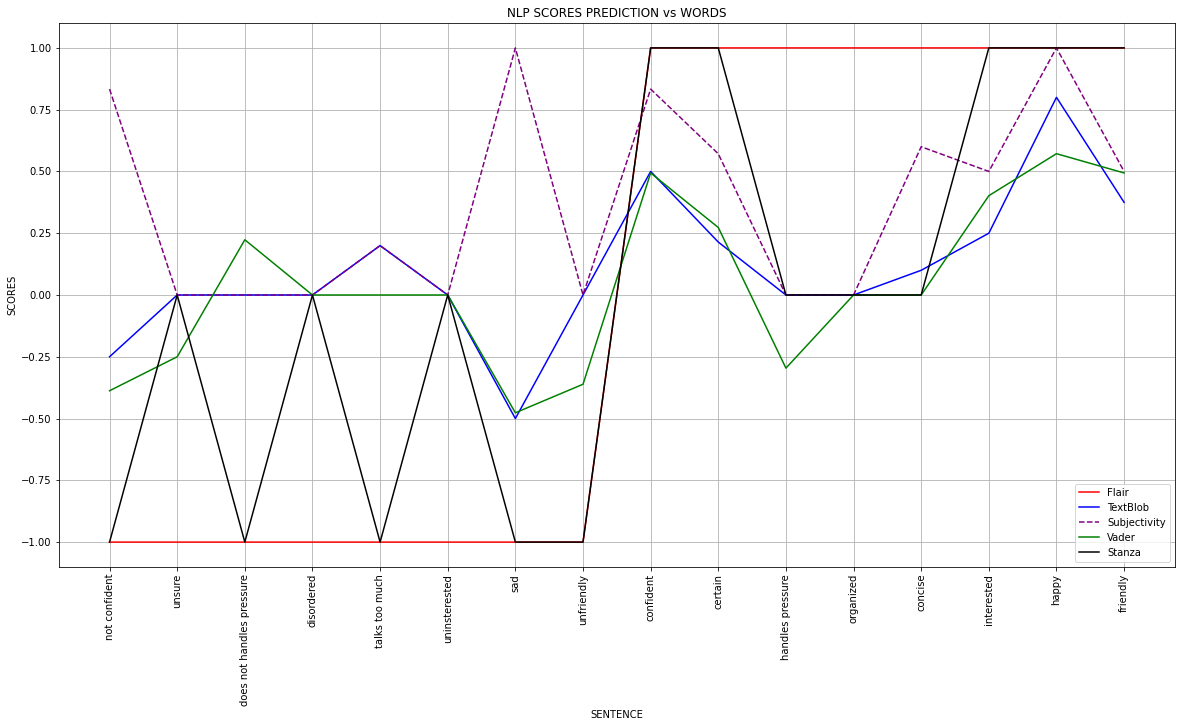

In [42]:
plot_lines(
    p1y=y_flair_values,
    p2y=y_textblob_sentiment,
    p3y=y_textblob_subjectivity,
    p4y=y_vader,
    p5y=y_stanza,
    x=x_plots,
    size=(20,  10)
)

In [43]:
def plot_flair(x, y):
    plt.figure(figsize=(10, 8))
    plt.plot(x, y, linestyle='solid', color='red', label='Flair')
    plt.title('Flair LSTM accuracy')
    plt.xlabel('SENTENCE')
    plt.ylabel('ACCURACY')
    plt.legend()
    plt.xticks(size=10, rotation='vertical')
    plt.yticks(size=10)
    plt.grid(True)
    
    plt.show()

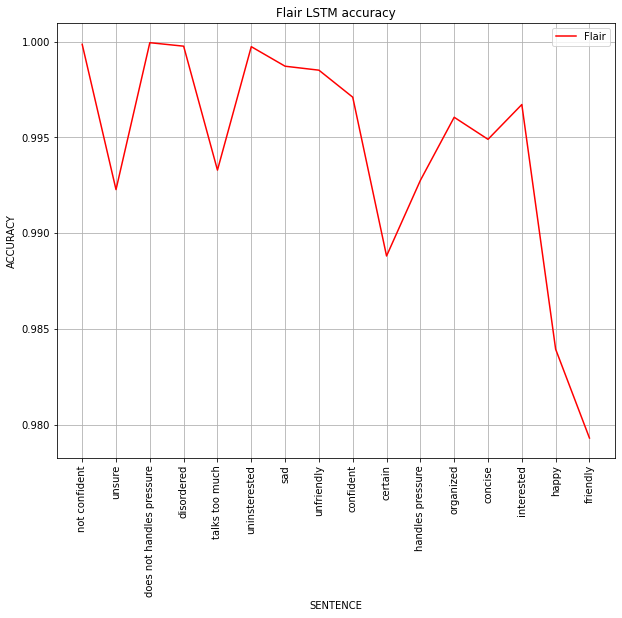

In [44]:
plot_flair(x_plots, y_flair_scores)

---
# **6. Brief positive conclusion**
---

1. **Flair** is great because the properties of the LSTM model: takes into account sequences of letters and words when predicting
2. **TextBlob** subjectivity works great
3. **Vader** & **Stanza (CNN)** are great to detect particular and intense positive or negative words

---

## To-do:
* SpaCy categorization
---

---
# **7. Preprocessing with each word**
---

Words play a central role in language and thought. Several influential factor analysis studies have shown that
the primary dimensions of word meaning are valence, arousal, and dominance (VAD).
- valence is the positive--negative or pleasure--displeasure dimension; 
- arousal is the excited--calm or active--passive dimension; 
- dominance is the powerful--weak or 'have control'--'have no control' dimension.



```
Each line has the following format:
<AffectCategory><tab><term><tab><score>
<AffectCategory> is one of eight emotions (anger, fear, anticipation, trust, surprise, sadness, joy, or disgust).
<term> is a word for which emotion associations are provided.
<score> is a value that indicates the strength of association between the <term> and the <AffectCategory>.
The higher the value, the stronger is the association. Refer to the publications below for details on how the score is calculated.
```



## Loading datasets lexicon

In [45]:
df_NRC_Hashtag = pd.read_csv('./datasets/NRC-Hashtag-Emotion-Lexicon-v0.2.csv', sep='\t')

In [46]:
df_NRC_Emotion_Intensity = pd.read_csv('./datasets/NRC-Emotion-Intensity-Lexicon-v1.csv', sep='\t')

In [47]:
df_NRC_Emotion_Wordlevel = pd.read_csv('./datasets/NRC-Emotion-Lexicon-Wordlevel-v0.92.csv', sep='\t')

In [48]:
# by sentece
df_isear = pd.read_csv('./datasets/isear.csv', sep='|', error_bad_lines=False, usecols=['SIT', 'Field1'])

### Column names & merge (concatenate)

In [49]:
df_NRC_Hashtag.columns = ['category', 'word', 'score']
df_NRC_Emotion_Intensity.columns = ['word', 'category', 'score']
df_NRC_Emotion_Wordlevel.columns = ['word', 'category', 'score']
df_isear.columns = ['category', 'sentence']

In [50]:
df_concat = pd.concat(objs=[df_NRC_Hashtag, df_NRC_Emotion_Intensity, df_NRC_Emotion_Wordlevel], ignore_index=True)

### Sorting concatenated dataset

In [51]:
df_concat = df_concat.sort_values(by=['category'], ascending=True, ignore_index=True)

### Labels lexicon

In [52]:
df_concat_labels = list(set(df_concat.category))

In [53]:
lexicon_labels = list(set(df_NRC_Hashtag.category))
lexicon_labels

['surprise',
 'anger',
 'anticipation',
 'sadness',
 'fear',
 'trust',
 'joy',
 'disgust']

In [54]:
lexicon_labels_isear = list(set(df_isear.category))
lexicon_labels_isear

['guilt', 'shame', 'anger', 'sadness', 'fear', 'joy', 'disgust']

## Loading datasets Valence Arousal Dominance

In [55]:
# by word
df_NRC_VAD_Lexicon = pd.read_csv('./datasets/NRC-VAD-Lexicon.csv', sep='\t')

In [56]:
df_NRC_VAD_Lexicon[df_NRC_VAD_Lexicon['Word'].str.contains('extremely positive', na=False)]

,Word,Valence,Arousal,Dominance
6384,extremely positive,0.993,0.73,0.839


In [57]:
df_NRC_VAD_Lexicon[df_NRC_VAD_Lexicon['Word'].str.contains('extremely disgust', na=False)]

,Word,Valence,Arousal,Dominance


In [58]:
# by sentence 
df_emobank = pd.read_csv('./datasets/emobank.csv', sep=',', usecols=['split', 'text', 'V', 'A', 'D'])

In [59]:
df_emobank

,split,V,A,D,text
0,train,3.00,3.00,3.20,"Remember what she said in my last letter? """
1,test,2.80,3.10,2.80,If I wasn't working here.
2,train,3.00,3.00,3.00,".."""
3,train,3.44,3.00,3.22,Goodwill helps people get off of public assist...
4,train,3.55,3.27,3.46,Sherry learned through our Future Works class ...
...,...,...,...,...,...
10057,train,3.00,3.50,3.00,Please let it be a constant reminder of all yo...
10058,train,3.80,3.40,3.60,That’s why I want to extend my appreciation fo...
10059,train,3.00,3.00,3.10,And why I’m writing you today to ask you to re...
10060,train,3.33,3.44,3.44,"In fact, I want to urge you to strengthen your..."


### Column names

In [60]:
df_NRC_VAD_Lexicon.columns = ['word', 'Valence', 'Arousal', 'Dominance']
df_emobank.columns = ['split', 'Valence', 'Arousal', 'Dominance', 'sentece']

## Graphs about categories (simple plot & bar)

In [61]:
x = ['not confident',
 'unsure',
 "can't handle pressure", # have not control
 'disordered',
 'talks to much',
 'uninsterested',
 'sad',
 'unfriendly',
 'confident',
 'certain',
 'can handles pressure', # have control
 'organized',
 'concise',
 'interested',
 'happy',
 'friendly']
xlst = [(lambda i: SIA.polarity_scores(i)['compound'])(i) for i in x]

In [62]:
def simple_plot(x, y):
    plt.figure(figsize=(16, 8))
    plt.plot(x, y, linestyle='solid', color='red')
    plt.xlabel('labels')
    plt.ylabel('scores')
    plt.legend(loc='upper left')
    plt.xticks(size=10, rotation='vertical')
    plt.yticks(size=10)
    plt.grid(b=True)

    plt.show()

def simple_bar(x, y, size):
    plt.figure(figsize=size)
    plt.bar(x, y, linestyle='solid', color='red')
    plt.xlabel('labels')
    plt.ylabel('scores')
    plt.legend(loc='upper left')
    plt.xticks(size=10, rotation='vertical')
    plt.yticks(size=10)
    plt.grid(b=True)

    plt.show()

No handles with labels found to put in legend.


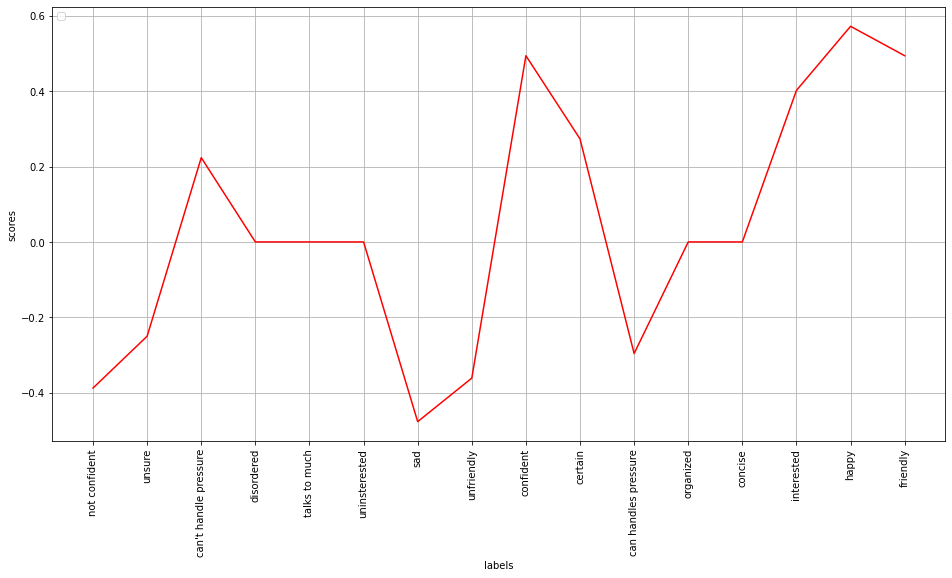

In [63]:
simple_plot(x, xlst)

In [64]:
print(xlst, end=', ')

[-0.3875, -0.25, 0.2235, 0.0, 0.0, 0.0, -0.4767, -0.3612, 0.4939, 0.2732, -0.296, 0.0, 0.0, 0.4019, 0.5719, 0.4939], 

---
# **8. Preprocessing dataframe concatenated**
---

In [65]:
def preprocessing_characteres(df, c):
    df[c] = df[c].apply(lambda x: re.sub("[^a-zA-Z]", " ", str(x)))
    df[c] = df[c].str.lower()
    df[c] = df[c].apply(lambda x: re.sub(r'(@[A-Za-z0-9]+)|([^0-9A-Za-zÁ-Úá-ú \t])|(\w+:\/\/\S+)|^rt|http.+?%', '', x))

    return df

In [66]:
df = preprocessing_characteres(df_concat, 'word')

## **NLP applying**

In [67]:
def drop_empty_string(df):
    # Warning: An empty Sentence was created!
    # Are there empty strings in your dataset?
    print('\nremoving empty values...\n')
    nan_value = float('NaN')
    df.replace('', nan_value, inplace=True)
    df.replace(' ', nan_value, inplace=True)
    df.replace('  ', nan_value, inplace=True)
    df.dropna(inplace=True)

    return df

In [68]:
def preprocessing_lexicon(df, c1, c2):
    print('\nRemoving scores equal to 0 & empty or space values\n')
    df.drop(df[df[c1] == 0]. index, inplace=True)
    df.drop(df[df[c2] == float]. index, inplace=True)
    df = drop_empty_string(df)
    
    print('Strip spaces both sides\n')
    df[c2] = df[c2].str.strip()

    return df

In [69]:
def nlp_apply(df, c):
    print('Vader\n')
    df['Compound'] = df[c].apply(lambda x: SIA.polarity_scores(text=x)['compound'])
    
    print('TextBlob')
    df['Subjectivity'] = df[c].apply(lambda x: text_blob_subjective(text=x)[1])
    
    df = drop_empty_string(df)

    print('Stanza')
    df['Stanza'] = df[c].apply(lambda x: stanza_funct(text=x))

    df = drop_empty_string(df)

    print('Flair\n')
    df['Flair'] = df[c].apply(lambda x: ''.join([i.value for i in flair_lstm(text=x)]))

    df = preprocessing_lexicon(df, 'score', 'word')

    return df

In [70]:
df = nlp_apply(df, 'word')

Vader

TextBlob

removing empty values...

Stanza
{...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}; {...}

In [71]:
# Checkpoint
df.to_csv('checkpoint-bywords.csv', encoding='utf-8', index=False)

---
# **9. Preprocessing VAD datasets**
---

### Grouping categories dataset by column value

In [189]:
group = df.groupby(df.category)

In [190]:
positive = group.get_group('positive')
negative = group.get_group('negative')
sadness = group.get_group('sadness')
joy = group.get_group('joy')
trust = group.get_group('trust')
anticipation = group.get_group('anticipation')
anger = group.get_group('anger')
surprise = group.get_group('surprise')
fear = group.get_group('fear')
disgust = group.get_group('disgust')

### Adding VAD columns & filling them with VAD values
http://saifmohammad.com/WebPages/nrc-vad.html

In [74]:
def fill_VAD(df, VAD):
    df.loc[:, 'Valence'] = VAD[0]
    df.loc[:, 'Arousal'] = VAD[1]
    df.loc[:, 'Dominance'] = VAD[2]  
    return  df

In [75]:
sadness = fill_VAD(df=sadness, VAD=[0.0520, 0.2880, 0.1640])
joy = fill_VAD(df=joy, VAD=[0.9800, 0.8240, 0.7949])
trust = fill_VAD(df=trust, VAD=[0.8880, 0.5470, 0.7410])
anticipation = fill_VAD(df=anticipation, VAD=[0.6980, 0.5390, 0.7110])
anger = fill_VAD(df=anger, VAD=[0.1670, 0.8650, 0.6570])
surprise = fill_VAD(df=surprise, VAD=[0.8750, 0.8750, 0.5620])
fear = fill_VAD(df=fear, VAD=[0.0730, 0.8400, 0.2930])
disgust = fill_VAD(df=disgust, VAD=[0.0520, 0.7750, 0.3170])

### Concatenating & sorting datasets: Categories with Quadrants

In [197]:
def concat(lst):
    df = pd.concat(objs=lst, ignore_index=True)
    return df

In [198]:
df_VAD = df_NRC_VAD_Lexicon

In [199]:
df_VAD = concat([df_VAD, sadness])
df_VAD = concat([df_VAD, joy])
df_VAD = concat([df_VAD, trust])
df_VAD = concat([df_VAD, anticipation])
df_VAD = concat([df_VAD, anger])
df_VAD = concat([df_VAD, surprise])
df_VAD = concat([df_VAD, fear])
df_VAD = concat([df_VAD, disgust])

### Delete duplicates & replace NaN with empty

In [79]:
#df_VAD = df_VAD.drop_duplicates(subset=['word'], keep=False)

In [117]:
df_VAD.replace(float('NaN'), '--', inplace=True)

### Applying NLP to VAD dataset

In [81]:
df_VAD = nlp_apply(df_VAD, 'word')

Vader

TextBlob

removing empty values...

Stanza

removing empty values...

Flair


Removing scores equal to 0 & empty or space values


removing empty values...

Strip spaces both sides



In [82]:
#df_VAD = preprocessing_characteres(df_VAD, 'word')
#df_VAD['word'] = df_VAD['word'].str.strip()
#df_VAD = df_VAD.dropna()

### Minimum & max value with middle point

In [83]:
def min_max_value(df, c):
    return df[c].min(), df[c].max()

In [84]:
def middle_point(df, c):
    '''Compute medium point from dataframe'''
    x1, x2 = min_max_value(df, c)
    return x2 - x1 / 2

In [85]:
df_VAD = preprocessing_characteres(df_VAD, 'word')
df_VAD['word'] = df_VAD['word'].str.strip()
df_VAD = df_VAD.dropna()

In [86]:
df_VAD

,word,Valence,Arousal,Dominance,category,score,Compound,Subjectivity,Stanza,Flair
0,aaaaaaah,0.479,0.606,0.291,empty,empty,0.0000,0.0,1,POSITIVE
1,aaaah,0.520,0.636,0.282,empty,empty,0.0000,0.0,1,POSITIVE
2,aardvark,0.427,0.490,0.437,empty,empty,0.0000,0.0,1,POSITIVE
3,aback,0.385,0.407,0.288,empty,empty,0.0000,0.0,1,POSITIVE
4,abacus,0.510,0.276,0.485,empty,empty,0.0000,0.0,1,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...
70067,disappoint,0.052,0.775,0.317,disgust,0.383,-0.4019,0.0,0,NEGATIVE
70068,mention,0.052,0.775,0.317,disgust,0.0863629,0.0000,0.0,1,POSITIVE
70069,fugitive,0.052,0.775,0.317,disgust,0.383,0.0000,0.0,1,NEGATIVE
70070,affront,0.052,0.775,0.317,disgust,0.422,0.0000,0.0,1,NEGATIVE


In [87]:
# COLUMNS: word, Arousal, Valence, Dominance
arousal_mp = middle_point(df_VAD, 'Arousal')
valence_mp = middle_point(df_VAD, 'Valence')
dominance_mp = middle_point(df_VAD, 'Dominance')

In [88]:
print('Min, Max')
print('Arousal: {}\nValence: {}\nDominance {}\n'.format(min_max_value(df_VAD, 'Arousal'), min_max_value(df_VAD, 'Valence'), min_max_value(df_VAD, 'Dominance')))

print('Medium point')
print('Arousal: {}\nValence: {}\nDominance {}'.format(arousal_mp, valence_mp, dominance_mp))

Min, Max
Arousal: (0.046, 0.99)
Valence: (0.0, 1.0)
Dominance (0.045, 0.991)

Medium point
Arousal: 0.967
Valence: 1.0
Dominance 0.9685


---
# **10. Quadrants**
---

since the drop function is used, the inequalities are inverse

### I. High Arousal, Positive Valence

In [89]:
first_quad =  df_VAD.drop(df_VAD[(df_VAD['Arousal'] < arousal_mp) & (df_VAD['Valence'] < valence_mp)].index)

### II. High Arousal, Negative Valance

In [90]:
second_quad = df_VAD.drop(df_VAD[(df_VAD['Arousal'] < arousal_mp) & (df_VAD['Valence'] > valence_mp)].index)

### III. Low Arousal, Negative Valance

In [91]:
third_quad = df_VAD.drop(df_VAD[(df_VAD['Arousal'] > arousal_mp) & (df_VAD['Valence'] > valence_mp)].index)

### IV. Low Arousal, Positive Valance

In [92]:
fourth_quad = df_VAD.drop(df_VAD[(df_VAD['Arousal'] > arousal_mp) & (df_VAD['Valence'] < valence_mp)].index)

### PLOT VAD

No handles with labels found to put in legend.


[19, 70072, 70072, 70060]


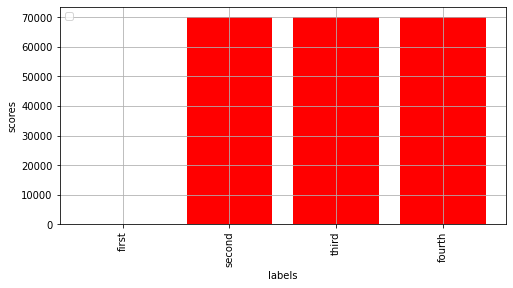

In [99]:
y_quad = list(map(len, [first_quad, second_quad, third_quad, fourth_quad]))

print(y_quad)
simple_bar(['first', 'second', 'third', 'fourth'], y_quad, size=(8, 4))

---
# **11. CATEGORIES**
---
There are four quadrants plus 3D called dominance (README.md)

In [179]:
def find_word(word, df, c='word'):
    return df[df[c].str.contains(word)]

### Confident
- confident -> trust
- unconfident -> disgust

In [172]:
confident = group.get_group('trust') 
unconfident = group.get_group('disgust')

In [173]:
confident['category'] = 'confident'
unconfident['category'] = 'unconfident'

# NOTE
# this where just based on the Wheel of emotions (R. Plutchik)
# as trust and disgust where opposites

### Handles pressure
In the positive side is included patience, focus and calm
- POS : dominance strong + low arousal + positive valence
- NEG : dominance weak + high arousal + negative valence

In [183]:
# Dominance: drop every weak feature
pos_hp = fourth_quad
dominance_mp_can_hp = middle_point(pos_hp, 'Dominance')
pos_hp = pos_hp.drop(pos_hp[(pos_hp['Dominance'] < dominance_mp_can_hp)].index)
pos_hp['category'] = 'pos hp'

# NOTE
# add more IV words, related to: calm, content, relaxed, focused

In [175]:
# opposite quadrante (opposite to IV -> II)
neg_hp = second_quad
dominance_mp_neg_hp = middle_point(neg_hp, 'Dominance')
neg_hp = neg_hp.drop(neg_hp[(neg_hp['Dominance'] > dominance_mp_neg_hp)].index)
neg_hp['category'] = 'neg hp'

# NOTE
# analyze positive words and drop them, they don't belong to negative valence
# maybe tranfer them to pos_hp

### Organized
- POS : anticipation + high arousal + positive valence   
- NEG : surprise + low arousal + negative valence

In [ ]:
organized = ''

In [ ]:
unorganized = ''

### Interested
- POS : [anticipation] + high arousal + positive valence
- NEG : [surprise] + low arousal + negative valence

In [209]:
interested = anticipation

# NOTE
# this where just based on the Wheel of emotions (R. Plutchik)
# as anticipation and surprise where opposites.
# And each events are: 
# vigilance --> anticipation --> [interest]
# amazement --> surprise --> [distraction]

In [211]:
uninterested = surprise

### Happy
- POS : joy + high arousal + positive valence
- NEG : sadness + low arousal + negative valence

In [206]:
happy = joy

In [207]:
unhappy = sadness

### Friendly
- POS : high arousal + positive valence + (positive) + (joy + trust)
- NEG : anger + high arousal + negative valence

In [204]:
friendly = concat([joy, trust, positive])

In [205]:
unfriendly = concat([anger, disgust, negative])

### PLOT Categories

#### POS

No handles with labels found to put in legend.


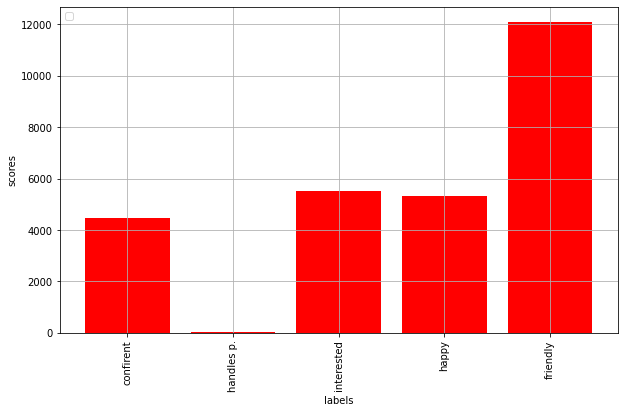

In [219]:
simple_bar(
    x=['confident', 'can hp', 'interested', 'happy', 'friendly'],
    y=list(map(len, [confident, pos_hp, interested, happy, friendly])),
    size=(10, 6)
)

#### NEG

No handles with labels found to put in legend.


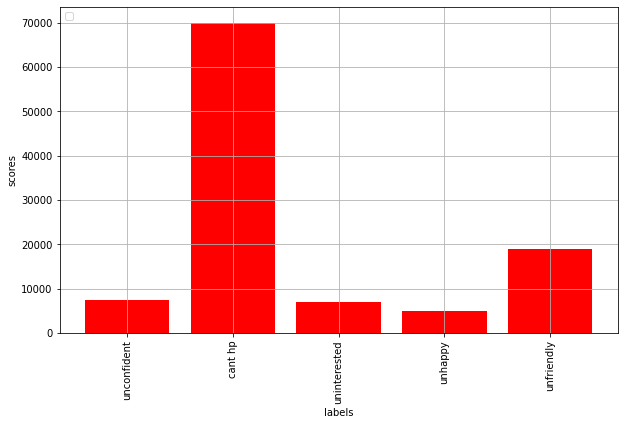

In [222]:
simple_bar(
    x=['unconfident', 'cant hp', 'uninterested', 'unhappy', 'unfriendly'],
    y=list(map(len, [unconfident, neg_hp, uninterested, unhappy, unfriendly])),
    size=(10, 6)
)

# **10. Test training SpaCy**

In [ ]:
# flair can complement stanza values
# if stanza value == 0, then assign the prediction from flair
# flair should be a different tokens by predicction
# e.g.: does not handles pressure 
# stanza == 0
# flair == -1
# flair == 0.98 == > -0.98 --> will mean the label {does not handles pressure}

In [ ]:
def cat_dict_funct(cat_dict, lst, n):
    for i in range(len(lst)):
        if i == n:
            cat_dict[lst[i]] = 1
        else:
            cat_dict[lst[i]] = 0

In [ ]:
df = pd.read_csv('checkpoint-bywords.csv', encoding='utf-8', sep=',')

In [ ]:
list(set(df.category))

In [ ]:
train_data = df
train_labels = list(set(df.category))
train_texts = train_data['word'].tolist()
train_cats = train_data['category'].tolist()

final_train_cats, cat_dict = [], {}

for cat in train_cats:
    if cat == 'anger':
        cat_dict_funct(cat_dict, train_labels, 0)
    elif cat == 'fear':
        cat_dict_funct(cat_dict, train_labels, 1)
    elif cat == 'disgust':
        cat_dict_funct(cat_dict, train_labels, 2)
    elif cat == 'positive':
        cat_dict_funct(cat_dict, train_labels, 3)
    elif cat == 'sadness':
        cat_dict_funct(cat_dict, train_labels, 4)
    elif cat == 'anticipation':
        cat_dict_funct(cat_dict, train_labels, 5)
    elif cat == 'joy':
        cat_dict_funct(cat_dict, train_labels, 6)
    elif cat == 'negative':
        cat_dict_funct(cat_dict, train_labels, 7)
    elif cat == 'surprise':
        cat_dict_funct(cat_dict, train_labels, 8)
    elif cat == 'trust':
        cat_dict_funct(cat_dict, train_labels, 9)
    final_train_cats.append(cat_dict)

In [ ]:
TRAIN_DATA = list(zip(train_texts, [{"cats": cats} for cats in final_train_cats]))
# msg = ''.join(str(v) for v in TRAIN_DATA)

In [ ]:
TRAIN_DATA[:2]

In [ ]:
nlp = spacy.load("en_core_web_sm")
category = nlp.create_pipe("textcat", config={"exclusive_classes": True})
nlp.add_pipe(category)

# add label to text classifier
category.add_label("trust")
category.add_label("fear")
category.add_label("disgust")
category.add_label("surprise")
category.add_label("anticipation")
category.add_label("anger")
category.add_label("joy")

In [ ]:
# get names of other pipes to disable them during training
n_iter = 10
pipe_exceptions = ["textcat", "trf_wordpiecer", "trf_tok2vec"]
other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]
with nlp.disable_pipes(*other_pipes):  # only train textcat
    optimizer = nlp.begin_training()
    
    for i in tqdm(range(n_iter)):
        losses = {}
        random.shuffle(TRAIN_DATA)
    
        for batch in tqdm(minibatch(TRAIN_DATA, size=50)):
            #texts = [nlp(text) for text, entities in batch]
            #annotations = [{"cats": entities} for text, entities in batch]
            texts, annotations = zip(*batch)
            try:
                nlp.update(texts, annotations, sgd=optimizer, losses=losses)
            except:
                pass
        print('\n{}. Losses: {}'.format(i, losses))

In [ ]:
def spacy_prediction(text):
    doc = nlp(u'{}'.format(text))  
    result = doc.cats
    index = np.argmax(result.values())
    res_value = list(result.values())[index] * 100
    res_label = list(result)[index]
    print('Prediction: {}, Value: {} %'.format(res_label, round(res_value)))

In [ ]:
spacy_prediction('joy')

## **Dropping unnecessary scores**

In [ ]:
sadness.drop(sadness[sadness.score == 0.000000]. index, inplace=True)
joy.drop(joy[joy.score == 0.000000]. index, inplace=True)
trust.drop(trust[trust.score == 0.000000]. index, inplace=True)
anticipation.drop(anticipation[anticipation.score == 0.000000]. index, inplace=True)
anger.drop(anger[anger.score == 0.000000]. index, inplace=True)
surprise.drop(surprise[surprise.score == 0.000000]. index, inplace=True)
fear.drop(fear[fear.score == 0.000000]. index, inplace=True)
disgust.drop(disgust[disgust.score == 0.000000]. index, inplace=True)

In [ ]:
version = '2'
df.to_csv('result' + version + '.csv', encoding='utf-8', index=False)